##### Set Up

In [1]:
## imports and dependencies 

# standard libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.neighbors import KNeighborsRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling 
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

##### Data

In [2]:
df = pd.read_csv("region_dataset.csv")

In [3]:
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Pos_AM', 'Pos_CB', 'Pos_CF', 'Pos_CM', 'Pos_DF', 'Pos_DM', 'Pos_FW', 'Pos_FW,DF', 'Pos_FW,MF', 'Pos_LB', 'Pos_LM', 'Pos_LW', 'Pos_MF', 'Pos_MF,DF', 'Pos_RB', 'Pos_RM',	'Pos_RW', 'Pos_SS'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

##### Models

In [9]:
lst = []

for i in range(1, int(len(df)**(1/2))):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)

    lst.append(mae)

    print("K used", i)
    print("Mean Absolute Error:", mae)
    print("")

K used 1
Mean Absolute Error: 0.6812978326311322

K used 2
Mean Absolute Error: 0.5795367117279592

K used 3
Mean Absolute Error: 0.550515661135178

K used 4
Mean Absolute Error: 0.5579194848281454

K used 5
Mean Absolute Error: 0.5496612214698752

K used 6
Mean Absolute Error: 0.551045453564432

K used 7
Mean Absolute Error: 0.5487956874578919

K used 8
Mean Absolute Error: 0.5526278705465096

K used 9
Mean Absolute Error: 0.5481413572592132

K used 10
Mean Absolute Error: 0.5455392013832174

K used 11
Mean Absolute Error: 0.5480317142751113

K used 12
Mean Absolute Error: 0.5471352353187355

K used 13
Mean Absolute Error: 0.5540243435214717

K used 14
Mean Absolute Error: 0.5570023596799162

K used 15
Mean Absolute Error: 0.5580607245669994

K used 16
Mean Absolute Error: 0.5571332758480929

K used 17
Mean Absolute Error: 0.5611649394088247

K used 18
Mean Absolute Error: 0.5622232718660157

K used 19
Mean Absolute Error: 0.5614687564429783

K used 20
Mean Absolute Error: 0.563866751

In [10]:
# KNN Scaled
KNN_scaled = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
KNN_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = KNN_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.5455392013832174


In [11]:
# KNN PCA
KNN_pca = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
KNN_pca.fit(x_train_pca, y_train)
y_pred_pca = KNN_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.5554526308210875


In [12]:
# model
lst = []

for i in range(1, int(len(df)**(1/2))):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train_scaled, y_train)

    y_pred = model.predict(x_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)

    lst.append(mae)

    print("K used", i)
    print("Mean Absolute Error:", mae)
    print("")

K used 1
Mean Absolute Error: 0.6812978326311322

K used 2
Mean Absolute Error: 0.5795367117279592

K used 3
Mean Absolute Error: 0.550515661135178

K used 4
Mean Absolute Error: 0.5579194848281454

K used 5
Mean Absolute Error: 0.5496612214698752

K used 6
Mean Absolute Error: 0.551045453564432

K used 7
Mean Absolute Error: 0.5487956874578919

K used 8
Mean Absolute Error: 0.5526278705465096

K used 9
Mean Absolute Error: 0.5481413572592132

K used 10
Mean Absolute Error: 0.5455392013832174

K used 11
Mean Absolute Error: 0.5480317142751113

K used 12
Mean Absolute Error: 0.5471352353187355

K used 13
Mean Absolute Error: 0.5540243435214717

K used 14
Mean Absolute Error: 0.5570023596799162

K used 15
Mean Absolute Error: 0.5580607245669994

K used 16
Mean Absolute Error: 0.5571332758480929

K used 17
Mean Absolute Error: 0.5611649394088247

K used 18
Mean Absolute Error: 0.5622232718660157

K used 19
Mean Absolute Error: 0.5614687564429783

K used 20
Mean Absolute Error: 0.563866751

In [13]:
lst.index(min(lst))

9

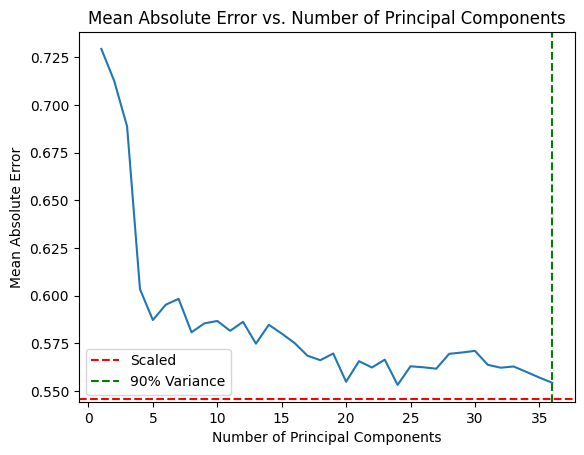

In [14]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    KNN = KNeighborsRegressor(n_neighbors=lst.index(min(lst))+1)
    KNN.fit(x_train_pca, y_train)
    y_pred = KNN.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [15]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(24, 0.5531625936444436)

In [16]:
mae_values

[0.7293671290261285,
 0.7125822196376835,
 0.6887358100566298,
 0.6033768608467968,
 0.5871990103584578,
 0.5952113736440304,
 0.5983186129085923,
 0.5807602322817804,
 0.5854394939296861,
 0.5867036404384901,
 0.5815380129176834,
 0.5862648890076574,
 0.5748139133810309,
 0.5847121467869558,
 0.5801059824217714,
 0.5751437863892535,
 0.5684774746086811,
 0.5661464838100153,
 0.5696328555208334,
 0.5548072207122147,
 0.5656008738000773,
 0.5622963069209174,
 0.5664162175118161,
 0.5531625936444436,
 0.5629327297195218,
 0.56240898899839,
 0.5616732155662443,
 0.5694751451435177,
 0.5701633103723891,
 0.5710248679499942,
 0.56370322957324,
 0.5621922870593059,
 0.5628354552149688,
 0.5599732787248192,
 0.5570240480152504,
 0.5542924147594313]